I have downloded a dataset of "Breast cancer" from the kaggle
1. With the dataset firsly i reduced the dimension using PCA and plot the scatter plot.
2. After that i did clustring analysis using KMean
3. laslty i have applied different type of  classification techniques(logistic regression,decision tree, random forest) on reduced dataset. 
   


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data=pd.read_csv('/content/data.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data=data.dropna(axis=1)

In [6]:
data.shape

(569, 32)

In [7]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**# Here I am donig labelencodig for "diagnosis" feature**

In [9]:
# here i am donig labelencodig for "diagnosis" feature
from sklearn.preprocessing import LabelEncoder
Label_y=LabelEncoder()
data.iloc[:,1]=Label_y.fit_transform(data.iloc[:,1])
data.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**Visualize the correlation**

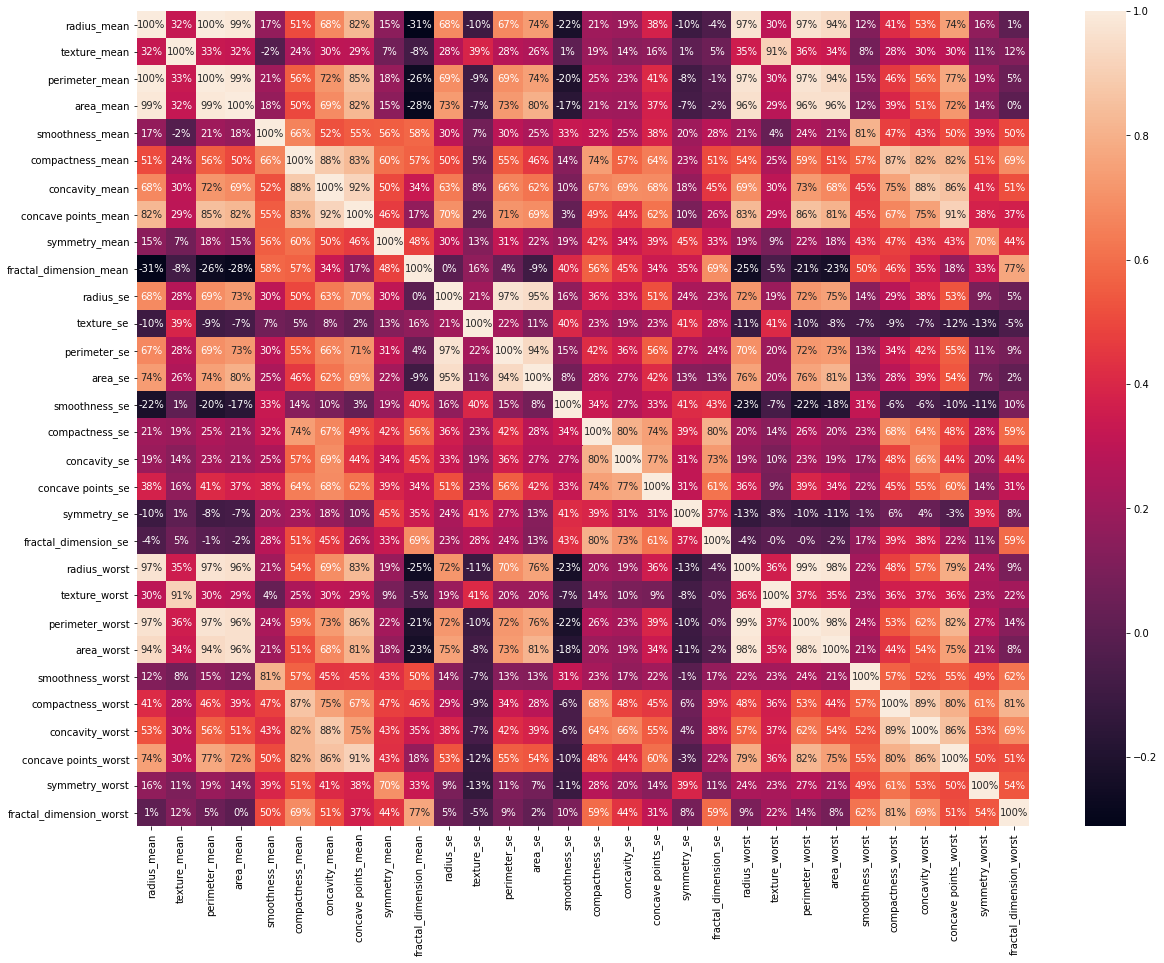

In [10]:
#visualize the correlation 
plt.figure(figsize=(20,15))
sns.heatmap(data.iloc[:,2:32].corr(),annot=True ,fmt='.0%')

In [11]:
y=data['diagnosis']
x=data.drop('diagnosis',axis=1)
y.shape
x.shape

(569, 31)

**1.Applying PCA**

In [12]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:

scaled_data=scalar.transform(x)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=2)

In [16]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
x_pca=pca.transform(scaled_data)

In [18]:
scaled_data.shape

(569, 31)

In [19]:
df=pd.DataFrame(x_pca,columns=['pca1','pca2'])

In [20]:
df['diagnosis']=y

In [21]:

df

,pca1,pca2,diagnosis
0,9.183200,1.971271,1
1,2.383298,-3.753459,1
2,5.742472,-1.080350,1
3,7.124384,10.272225,1
4,3.945694,-1.959689,1
...,...,...,...
564,6.435329,-3.565358,1
565,3.789458,-3.573419,1
566,1.251890,-1.893977,1
567,10.365035,1.696398,1


**After the reducing a dimension of dataset now we have 2 pca components**

**2.1 Here is the scatter plot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


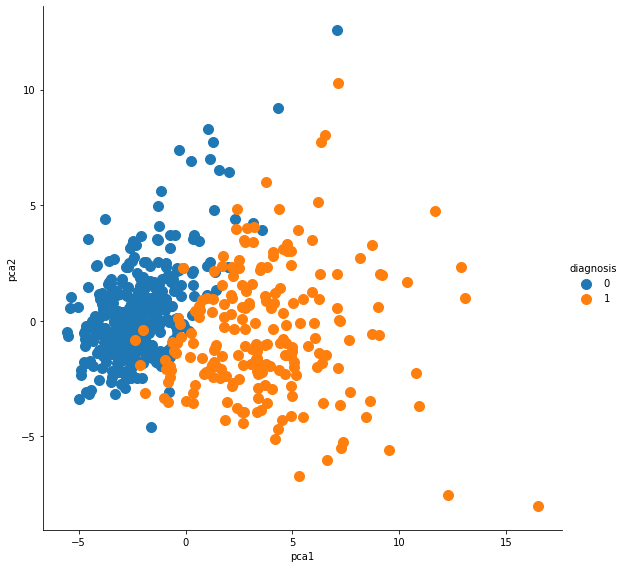

In [22]:
import seaborn as sn
sn.FacetGrid(df,hue="diagnosis",size=8).map(plt.scatter,"pca1","pca2",s=100).add_legend()

In [23]:
x_pca.shape

(569, 2)

**2.2  Here we are trying to find out number of clusters using "Elbow method".**

In [24]:
from sklearn.cluster import KMeans
k_range= range(1,10)
sse=[]
for k in k_range:
   km=KMeans(n_clusters=k)
   km.fit(df[['pca1','pca2']])
   sse.append(km.inertia_)

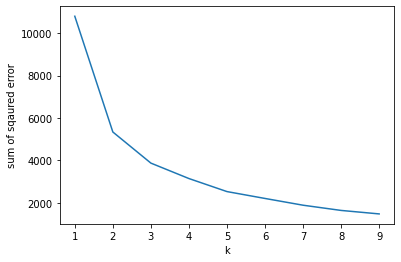

In [25]:
plt.xlabel('k')
plt.ylabel("sum of sqaured error")
plt.plot(k_range,sse)

**After getting cluster number using help of elbow method ,here we have found that 2 cluster will be formed with this data**

In [26]:
km=KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
y_predicted=km.fit_predict(df[['pca1','pca2']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [28]:
df['cluster']=y_predicted
df.head

<bound method NDFrame.head of           pca1       pca2  diagnosis  cluster
0     9.183200   1.971271          1        0
1     2.383298  -3.753459          1        0
2     5.742472  -1.080350          1        0
3     7.124384  10.272225          1        0
4     3.945694  -1.959689          1        0
..         ...        ...        ...      ...
564   6.435329  -3.565358          1        0
565   3.789458  -3.573419          1        0
566   1.251890  -1.893977          1        0
567  10.365035   1.696398          1        0
568  -5.478264  -0.672788          0        1

[569 rows x 4 columns]>

**Here we can see clearly two clusters**

No handles with labels found to put in legend.


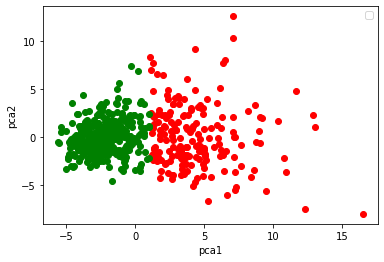

In [29]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
plt.scatter(df1.pca1, df1['pca2'],color='red')
plt.scatter(df2.pca1, df2['pca2'],color='green')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()

In [30]:
x = df.iloc[:,0:2] 
x

,pca1,pca2
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689
...,...,...
564,6.435329,-3.565358
565,3.789458,-3.573419
566,1.251890,-1.893977
567,10.365035,1.696398


In [31]:
df

,pca1,pca2,diagnosis,cluster
0,9.183200,1.971271,1,0
1,2.383298,-3.753459,1,0
2,5.742472,-1.080350,1,0
3,7.124384,10.272225,1,0
4,3.945694,-1.959689,1,0
...,...,...,...,...
564,6.435329,-3.565358,1,0
565,3.789458,-3.573419,1,0
566,1.251890,-1.893977,1,0
567,10.365035,1.696398,1,0


In [32]:
x

,pca1,pca2
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689
...,...,...
564,6.435329,-3.565358
565,3.789458,-3.573419
566,1.251890,-1.893977
567,10.365035,1.696398


In [33]:

y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**3. With the reduced dataset , we will split the dataset into independent(x) and dependent (y) data sets**

**Performing Linear Regression on dataset**

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred=regressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

In [38]:
score   #Generating rsquare score


0.6661039983065037

In [39]:
from sklearn import linear_model
reg= linear_model.LinearRegression()

In [40]:
reg.fit(df[['pca1','pca2']],df.diagnosis)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
reg.coef_    

array([ 0.10416884, -0.03788   ])

In [42]:
reg.intercept_

0.37258347978910367

In [43]:
reg.predict([[9.183200,1.971271]])

array([1.25451505])

**Here spliting the dataset into 80% training and 20% testing**

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(x,y,test_size=0.20, random_state=0)


In [45]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**Here we using classification tech like logistic regression , Decision tree , Random forest for function**

In [46]:
def models(X_train, Y_train):
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  #print the model accuracy
  print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
  print('[1]Decision tree classifier Training Accuracy:',tree.score(X_train,Y_train))
  print('[2]Random forest Training Accuracy:',forest.score(X_train,Y_train))
  
  return log,tree,forest

Accuracy of these **models**

In [47]:
model =models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9516483516483516
[1]Decision tree classifier Training Accuracy: 1.0
[2]Random forest Training Accuracy: 0.9956043956043956


**# Test model accuracy on test data on confusion matrix**

In [48]:
# test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
   print('Model',i)
   cm= confusion_matrix(Y_test,model[i].predict(X_test))
   TP =cm[0][0]
   TN =cm[1][1]
   FN =cm[1][0]
   FP =cm[0][1]
   print(cm)
   print('Testing Accuracy=',(TP+TN)/(TP+TN+FN+FP))
   print()

Model 0
[[64  3]
 [ 4 43]]
Testing Accuracy= 0.9385964912280702

Model 1
[[62  5]
 [ 4 43]]
Testing Accuracy= 0.9210526315789473

Model 2
[[64  3]
 [ 6 41]]
Testing Accuracy= 0.9210526315789473



In [49]:
#show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
   print('Model',i)
   print(classification_report(Y_test,model[i].predict(X_test)))
   print(accuracy_score(Y_test,model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

0.9385964912280702
Model 1
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

0.9210526315789473
Model 2
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg

In [50]:
# print the prediction of random forest classifier moder
pred =model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: int64


**Thank you**